# MVP: Machine Learning Algorithm to predict Car's Price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

## Import Data

In [2]:
root = '../data/cleaned_cars.csv'

In [3]:
df = pd.read_csv(root)
df.head()

,title,brand,model,type,city,gearbox,doors,color,co2_emiss,fuel_type,...,dealer,chassis,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price
0,Smart Fortwo Cabrio 52 Mhd Pure Aut.,SMART,FORTWO,sports,Alicante,Automatic,2,WHITE,99,Gasoline,...,Professional,Convertible,157,270,145,4.3,780,33,13.7,5500
1,Volkswagen Scirocco 2.0 Tsi,VOLKSWAGEN,SCIROCCO,sports,Barcelona,Manual,3,WHITE,179,Gasoline,...,Professional,Coupe,140,426,235,7.6,1373,55,7.2,10900
2,Bmw Serie 2 218da Gran Coupé,BMW,SERIE 2,sports,Cantabria,Automatic,4,OTHER,109,Diesel,...,Professional,Coupe,142,453,222,4.2,1545,42,8.5,36100
3,Bmw X4 Xdrive 20d,BMW,X4,sports,Girona,Automatic,5,WHITE,142,Diesel,...,Professional,Coupe,162,467,212,5.4,1740,67,8.0,28000
4,Dodge Viper Srt-10,DODGE,VIPER,sports,Unknown,Automatic,2,RED,488,Gasoline,...,Professional,Coupe,123,446,189,21.0,1546,70,3.9,27990


## Data Visualization

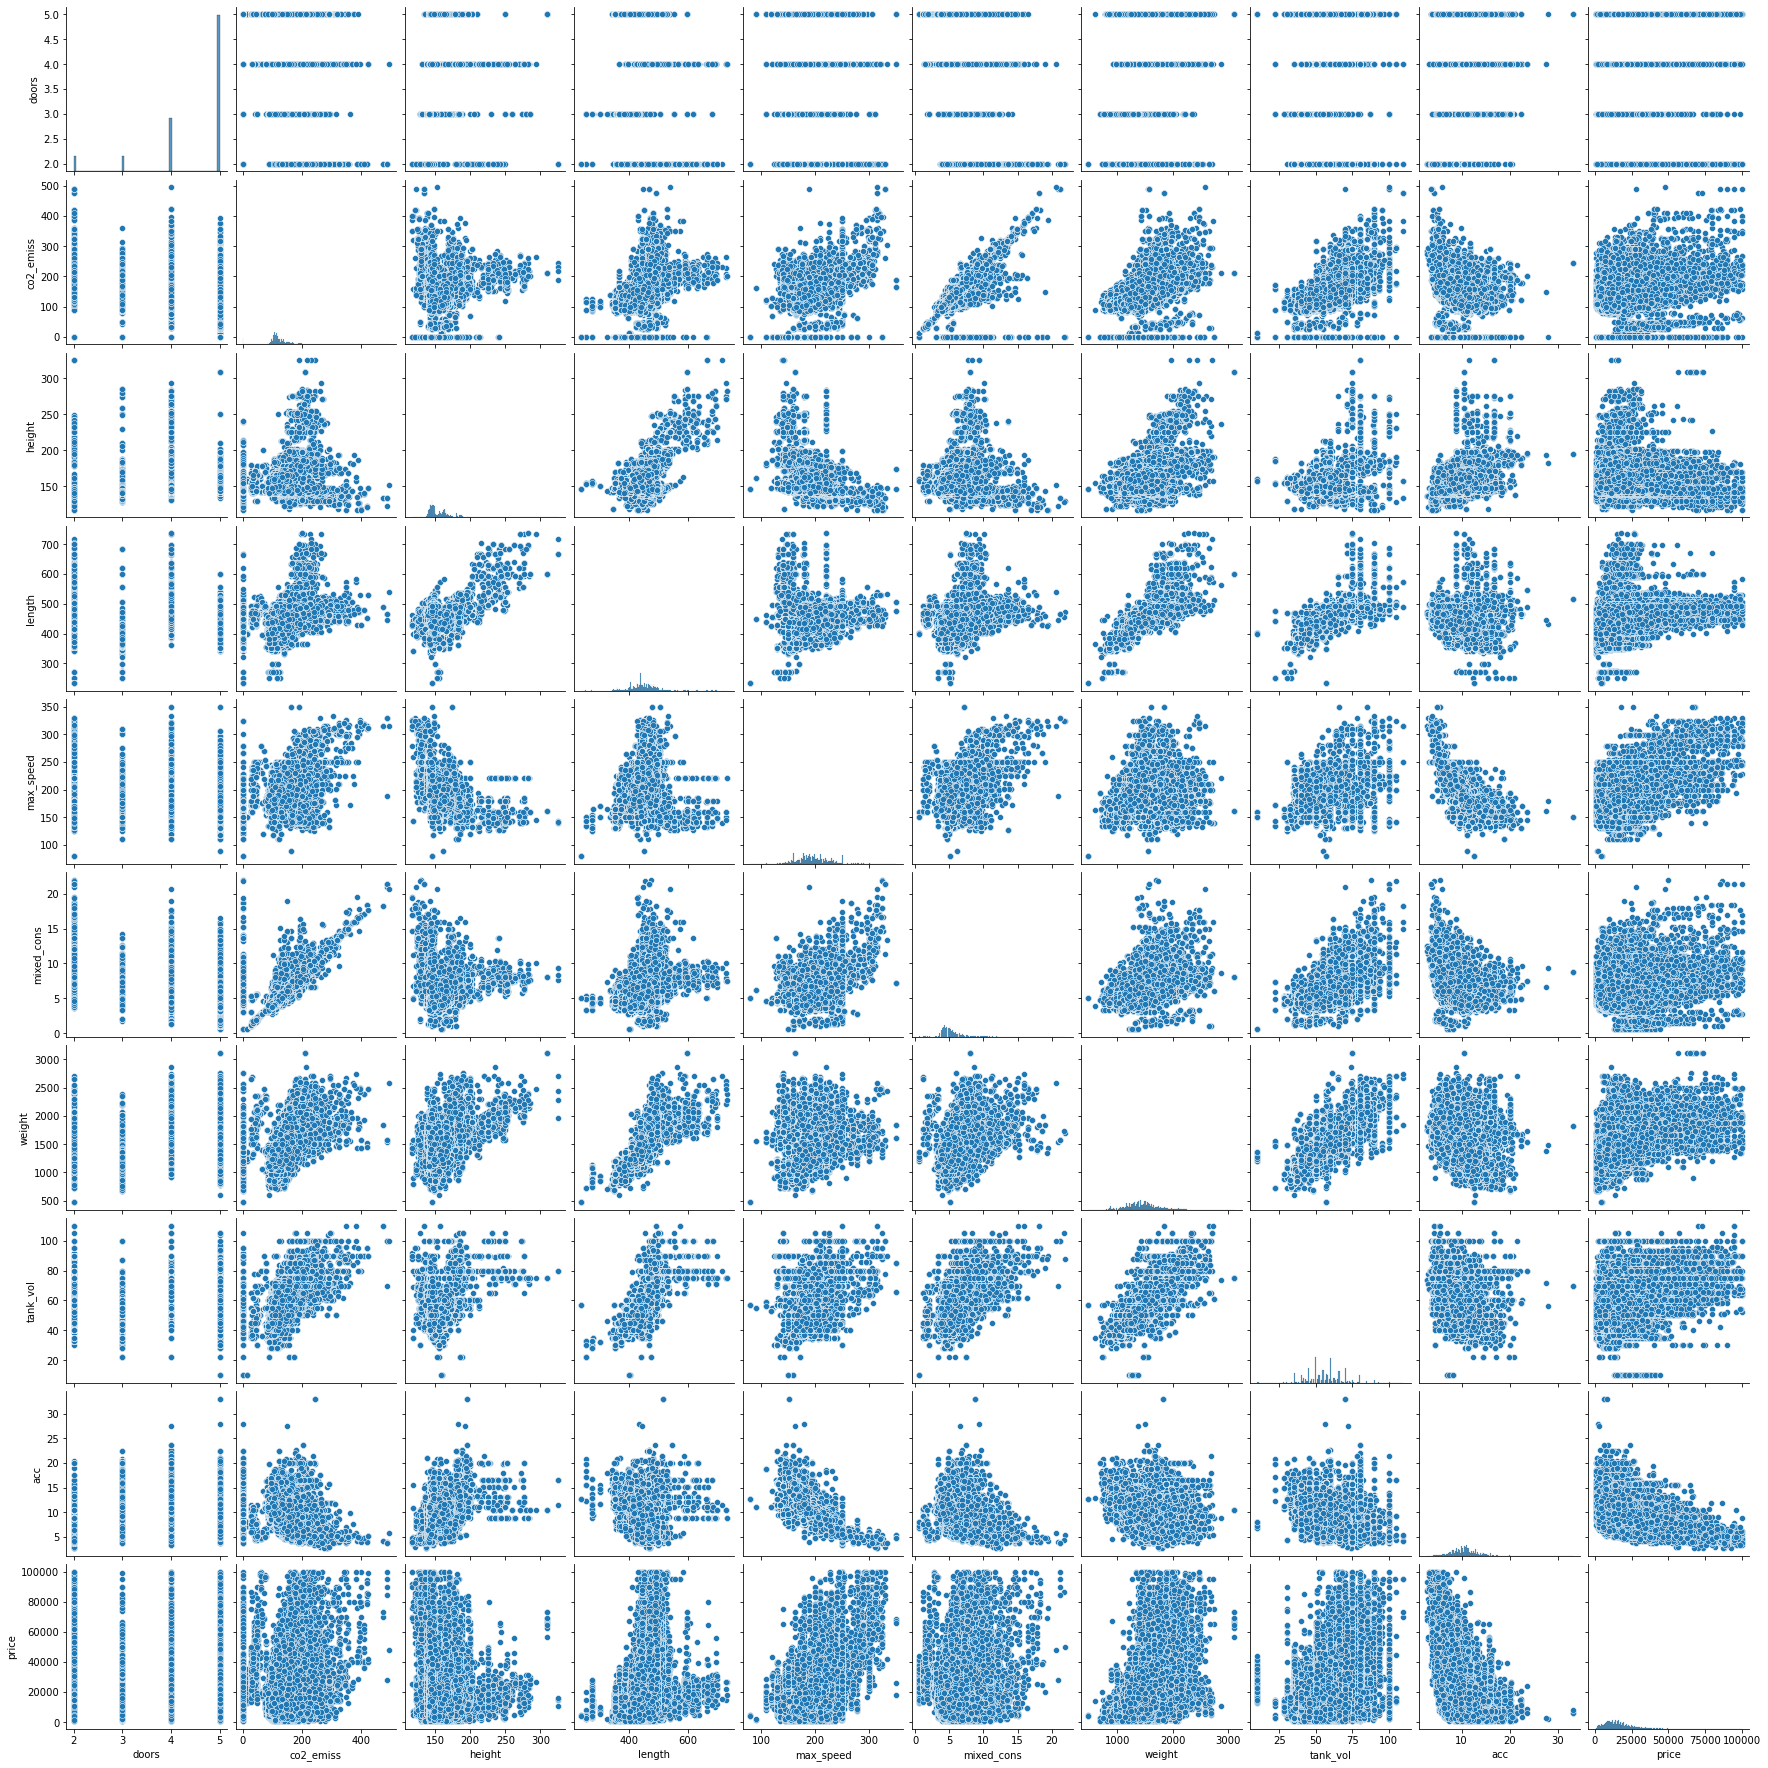

In [4]:
sns.pairplot(df)
plt.savefig('fig/06_pairplot.png')

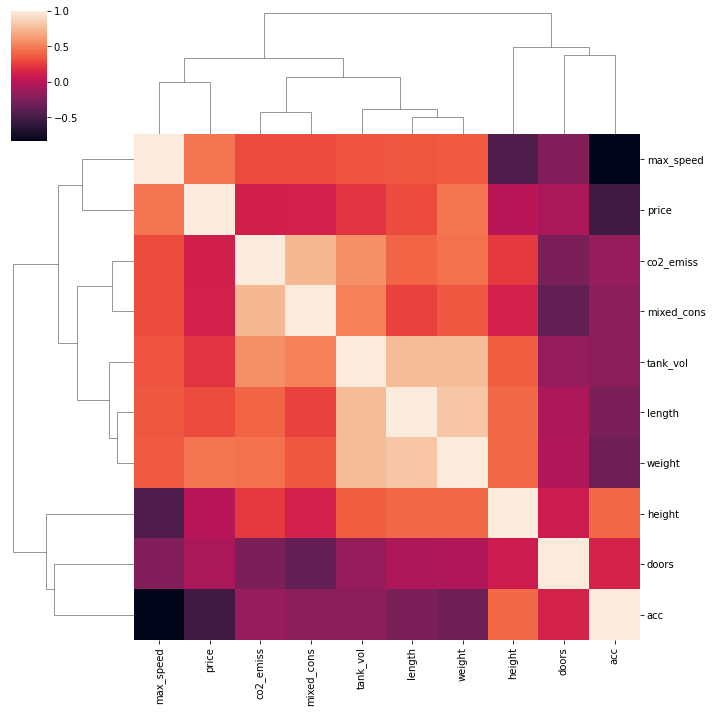

In [5]:
sns.clustermap(df.corr())
plt.savefig('fig/06_corr_matrix.png')

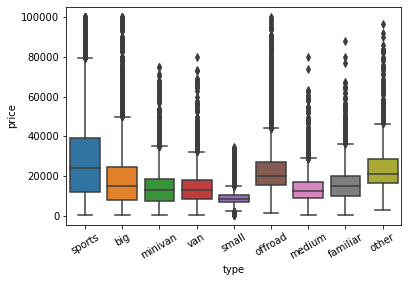

In [6]:
sns.boxplot(data=df, x='type', y='price')

plt.xticks(rotation=30)

plt.savefig('fig/06_prices_outlier.png')
plt.show()

We have detected a major outlier on the price that will be removed from the source

## Data Cleansing

In [7]:
import sys
sys.path.append('..')
from modules.car_cleanser import rm_outliers

In [8]:
df = rm_outliers(df)
df.price.max()

99990

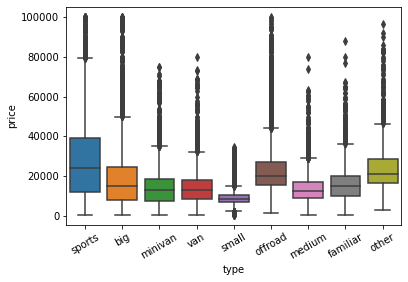

In [9]:
sns.boxplot(data=df, x='type', y='price')

plt.xticks(rotation=30)

plt.show()

## Data Modeling

### Price

In [10]:
# Dividing the data into target and features
features = df[df.select_dtypes('number').columns[:-1]]
target = df[df.columns[-1]]    # Price

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
predictions = lr.predict(X_test)

In [13]:
predictions

array([ 9634.34191877,  8352.97107035,  7815.16371991, ...,
       32974.99763073, 13327.32328951, 22379.32064124])

### Type

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Dividing the data into target and features
features_t = df[df.select_dtypes('number').columns]
target_t = df['type']    # Type

In [16]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(features_t, target_t)

tree = DecisionTreeClassifier()
tree.fit(X_train_t, y_train_t)

DecisionTreeClassifier()

In [17]:
predictions_t = tree.predict(X_test_t)

In [18]:
predictions_t

array(['sports', 'medium', 'other', ..., 'minivan', 'offroad', 'minivan'],
      dtype=object)

## Model Evaluation

### Price

In [19]:
from modules.model_evaluator import eval_reg

In [20]:
eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.4476

RMSE = 9427.1984

MSE = 88872068.9121

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 6654.2294

EVS = 44.7645%



### Type
Multilabel classifier

In [21]:
from modules.model_evaluator import eval_cls

### MEASURES OF CLASSIFICATION MODEL ###
----------------------------------------

Accuracy score = 94.2923%

LogLoss cannot be applied to string.

Avg Precision score = 94.2001%

Recall score = 94.2923%

F1 score = 94.2449%

Confusion matrix:
[[2386   13    5    0    0    0    0    6    0]
 [   6  722    9    1   11    7    0    3    1]
 [   3    8 2273    7    7  111    1    2    6]
 [   0    0    1 2054   25    2    0    1   18]
 [   0    4    5   18 2222  161    0    2    6]
 [   1    3  139    3  155  113    0    1    0]
 [   0    0    2    0    0    0  656    0    0]
 [   1    1    1    0    0    0    0 1280    1]
 [   1    1    4   25    0    1    0    0 1345]]



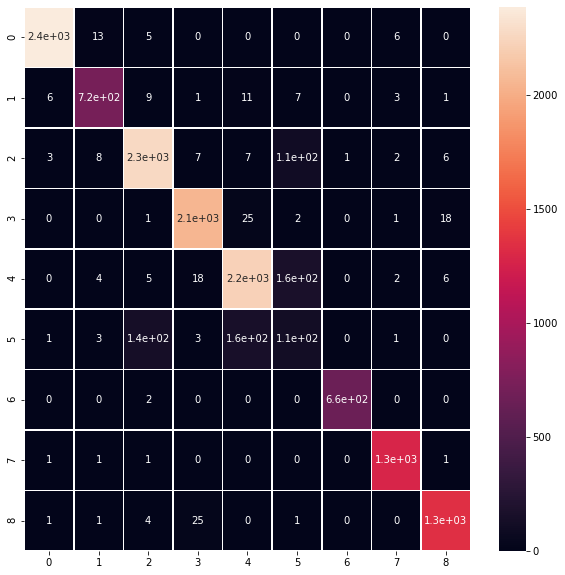

In [22]:
eval_cls(y_test_t, predictions_t)
plt.savefig('fig/06_confusion_matrix.png')